# F20DL Lab 7

## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=8)
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
# Load the dataset into a pandas dataframe
ds = pd.read_csv("./datasets/Dry_Bean_Dataset.csv")

In [3]:
data = ds[ds.columns.difference(["Class"])]    # Original dataset without 'Class' attribute
target = ds["Class"]

## Clustering and Visualisation Setup

In [4]:
min_k = 2
max_k = 7
k_range = max_k - min_k + 1

prediction_KMeans = []
prediction_GMM = []
prediction_Hierarchical = []

In [5]:
def plot_scatterplot(X, f1, f2, pred, title):
    plt.scatter(X[f1], X[f2], c=pred, s=5, alpha=0.8, cmap="Dark2")
    plt.title(title, fontsize=10)

In [6]:
from sklearn.preprocessing import LabelEncoder

# Get labels encoded as numbers (0, 1, 2,...)
target_n = LabelEncoder().fit_transform(target)

## k-means Clustering

In [7]:
from sklearn.cluster import KMeans

# Get predictions for k in range min_k to max_k
for k in range(min_k, max_k+1):
    clusterer = KMeans(n_clusters=k, random_state=6)
    prediction_KMeans.append(clusterer.fit_predict(data))

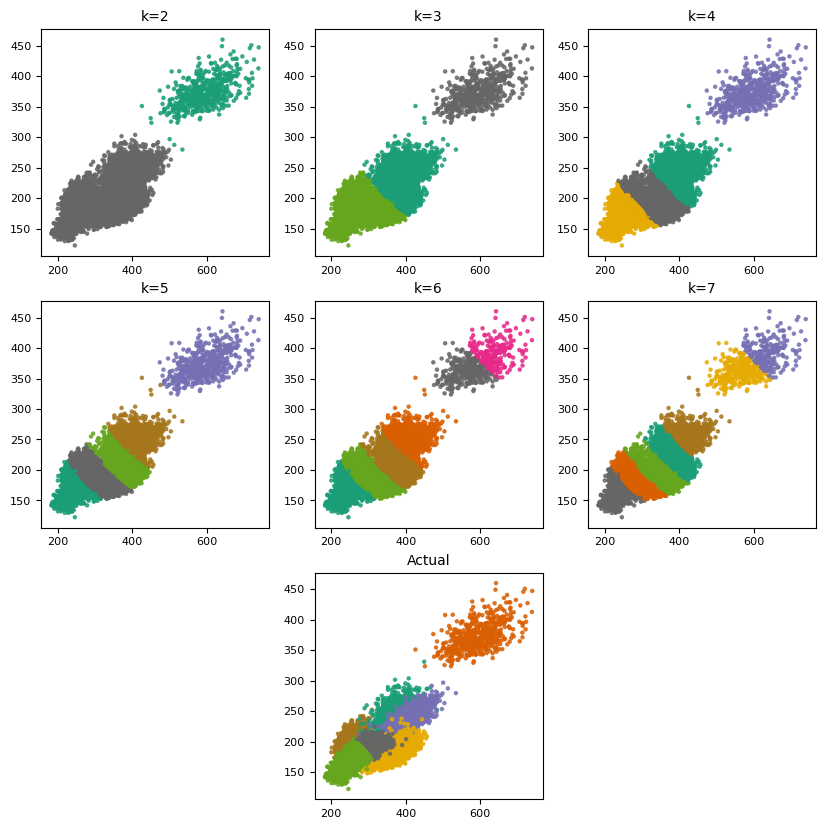

In [8]:
plt.figure(figsize=(10, 10))

for i in range(k_range):
    plt.subplot(3, 3, i+1)
    plot_scatterplot(data, "MajorAxisLength", "MinorAxisLength", prediction_KMeans[i], "k=%i" % (i+min_k))

plt.subplot(3, 3, 8)
plot_scatterplot(data, "MajorAxisLength", "MinorAxisLength", target_n, "Actual")
plt.show()

# The clustering is not very accurate since the data is not clearly separated (at least when comparing major vs. minor 
# axis length). The data seems to be grouped into two blobs and when k=2, this is identified accurately. However, for 
# higher k values, the points in a cluster seem to simply be the ones closest to each other.
# Since this is an unsupervised learning method, it can be hard for the algorithm to accurately cluster the data with
# no starting point.

Text(0, 0.5, 'WCSS')

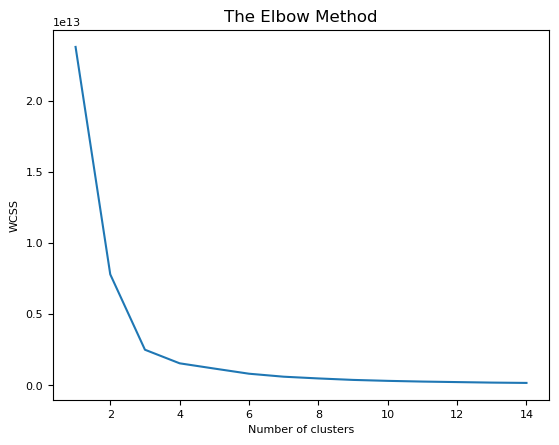

In [9]:
wcss=[]
for i in range(1,15):
    classifier = KMeans(i)
    classifier.fit(data)
    wcss_iter = classifier.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,15)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# The Elbow Method can help determine the optimal number of clusters but is not always accurate. It tends to give a 
# value at which having fewer clusters likely means the clustering is very inaccurate but having more clusters only 
# marginally increases the accuracy of clustering. This is why the elbow is at 3 instead of the expected 7.

## GMM Clustering

In [10]:
from sklearn.mixture import GaussianMixture

for k in range(min_k, max_k+1):
    clusterer = GaussianMixture(n_components=k, random_state=6)
    prediction_GMM.append(clusterer.fit_predict(data))

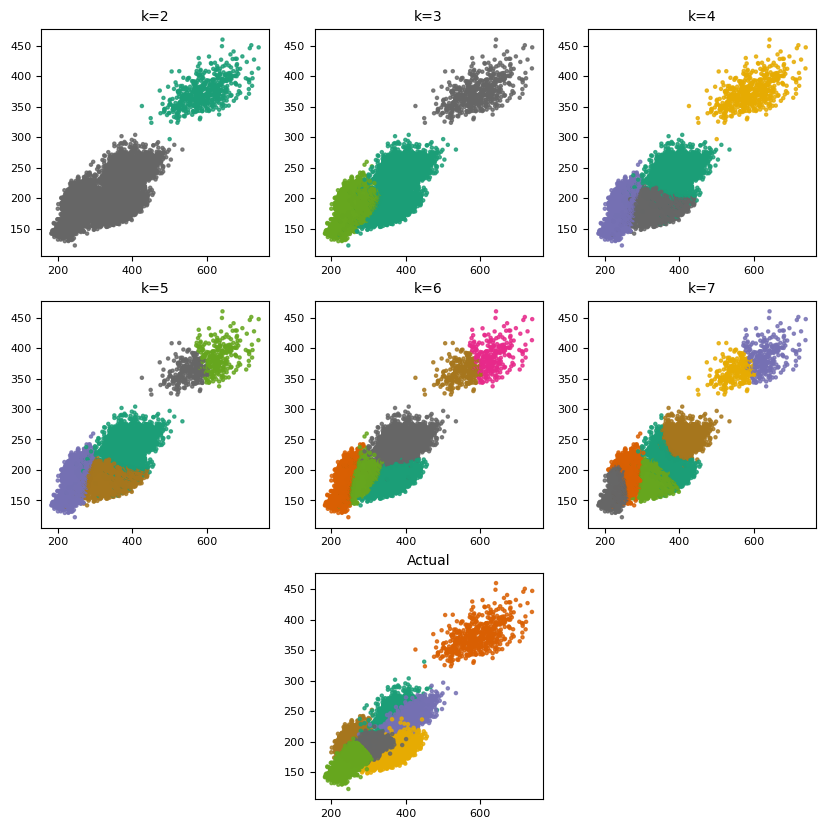

In [11]:
plt.figure(figsize=(10, 10))

for i in range(k_range):
    plt.subplot(3, 3, i+1)
    plot_scatterplot(data, "MajorAxisLength", "MinorAxisLength", prediction_GMM[i], "k=%i" % (i+min_k))

plt.subplot(3, 3, 8)
plot_scatterplot(data, "MajorAxisLength", "MinorAxisLength", target_n, "Actual")
plt.show()

# The clustering seems to be slightly more accurate than KMeans but is still quite inaccurate compared to the actual data.

## Hierarchical Clustering

In [12]:
from sklearn.cluster import AgglomerativeClustering

for k in range(min_k, max_k+1):
    clusterer = AgglomerativeClustering(n_clusters=k, linkage="ward")
    prediction_Hierarchical.append(clusterer.fit_predict(data))

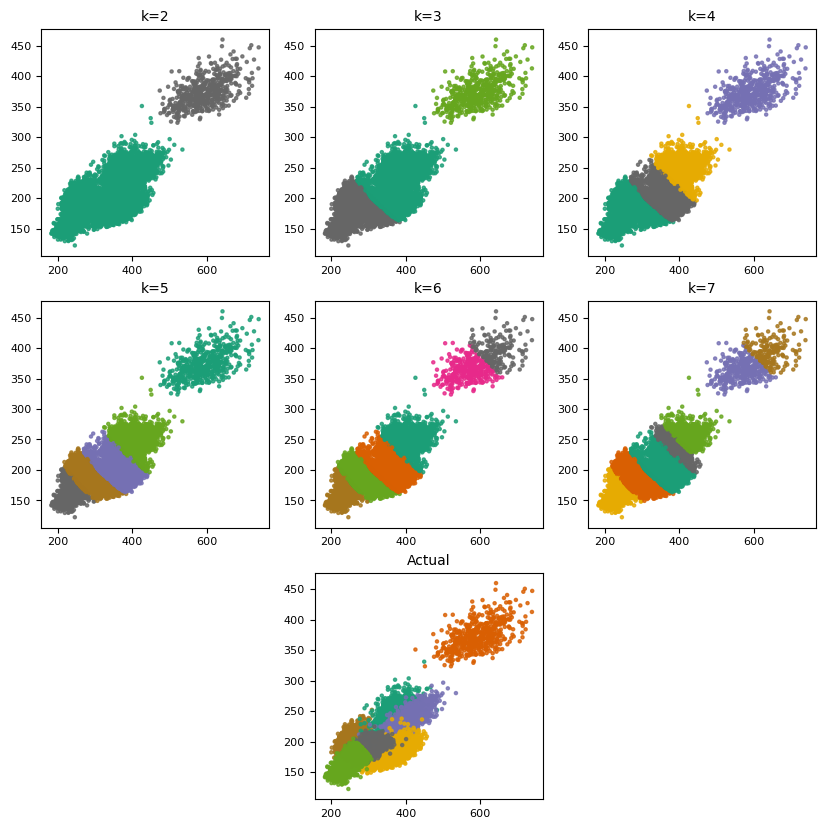

In [13]:
plt.figure(figsize=(10, 10))

for i in range(k_range):
    plt.subplot(3, 3, i+1)
    plot_scatterplot(data, "MajorAxisLength", "MinorAxisLength", prediction_Hierarchical[i], "k=%i" % (i+min_k))

plt.subplot(3, 3, 8)
plot_scatterplot(data, "MajorAxisLength", "MinorAxisLength", target_n, "Actual")
plt.show()

# The clustering is very similar to that of KMeans. 
# Agglomerative hierarchical clustering is done by first putting all samples into their own clusters and then merging 
# the closest samples into larger clusters. This is probably why the clusters seem to just contain the closest points.